<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tkinter import Tk
from tkinter.filedialog import askopenfilename
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline
plt.style.use('default')


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [143]:
#ваш код здесь

def select_file():
    Tk().withdraw()  # Скрыть главное окно Tkinter
    filename = askopenfilename(title="Выберите исходный файл", filetypes=[("Excel files", "*.csv")])
    return filename
file_path = select_file()
hh_data = pd.read_csv(file_path, sep=';')


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [144]:
#ваш код здесь
display(hh_data.head(2))

display(hh_data.tail(2))


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [145]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

Пустые строки имеют три признака:

    Опыт работы

    Последнее/нынешнее место работы
    
    Последняя/нынешняя должность

5. Выведите основную статистическую информацию о столбцах.


In [146]:
#ваш код здесь
hh_data.describe()


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [147]:
#ваш код здесь
hh_data["Образование"] = hh_data["Образование и ВУЗ"].str.split().str[:2].str.join(" ")
hh_data = hh_data.drop(columns=['Образование и ВУЗ'])
hh_data.groupby("Образование").size()


Образование
Высшее образование     33863
Неоконченное высшее     4557
Среднее образование      559
Среднее специальное     5765
dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


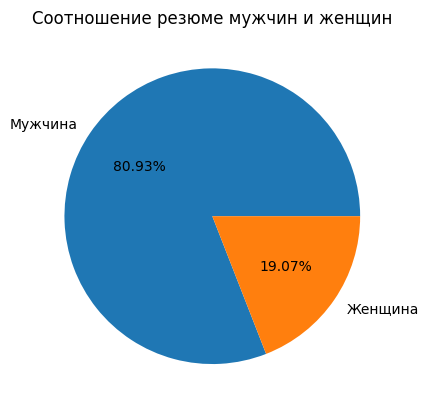

In [148]:
#ваш код здесь
hh_data["Пол"] = hh_data["Пол, возраст"].str.split(' ,').str[0].str[0]
hh_data["Возраст"] = hh_data["Пол, возраст"].str.split(' ').str[3].astype(int)
hh_data = hh_data.drop(columns=['Пол, возраст'])
hh_data["Пол"].unique()

count_m = hh_data[hh_data['Пол'] == 'М'].shape[0]
count_g = hh_data[hh_data['Пол'] == "Ж"].shape[0]

plt.pie([count_m, count_g], labels=['Мужчина',"Женщина"], autopct='%1.2f%%')
plt.title(f'Соотношение резюме мужчин и женщин')
plt.show()


In [149]:
hh_data["Возраст"].unique()
round(hh_data["Возраст"].mean(),1)
display(hh_data.tail(2))
hh_data.info()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,Высшее образование,М,24
44743,120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,05.07.2018 20:15,Не указано,Высшее образование,М,38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График                           44744 non-null  object
 5   Опыт работы                      44576 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Обновление резюме                44744 non-null  object
 9   Авто                             44744 non-null  object
 10  Образование                      44744 non-null  object
 11  Пол                              44744 non-null  object
 12  Возраст                         

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [150]:
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)
hh_data = hh_data.drop('Опыт работы', axis=1)
print(round(hh_data['Опыт работы (месяц)'].median()))

100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [151]:
#ваш код здесь

def city(stroka):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = stroka.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(city)

print(hh_data['Город'].unique())

['другие' 'Москва' 'город миллионник' 'Санкт-Петербург']


In [152]:
def get_ready_to_move(stroka):
    if ('не готов к переезду' in stroka) or ('не готова к переезду' in stroka):
        return False
    elif 'хочу' in stroka:
        return True
    else:
        return True

hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_move)

In [153]:
def get_ready_for_bisiness_trips(stroka):
    if ('командировка' in stroka):
        if ('не готов к командировкам' in stroka) or('не готова к командировкам' in stroka):
            return False
        else: 
            return True
    else:
        return False
    
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)

In [154]:
hh_data.drop(columns=['Город, переезд, командировки'], inplace=True)

In [155]:
# Общее количество соискателей
total_applicants = hh_data.shape[0]

# Количество соискателей, живущих в Санкт-Петербурге
spb_applicants = hh_data[hh_data['Город'] == 'Санкт-Петербург'].shape[0]

# Вычисление процента и округление до целого числа
spb_percentage = round((spb_applicants / total_applicants) * 100)

print(f"Процент соискателей, живущих в Санкт-Петербурге: {spb_percentage}%")


Процент соискателей, живущих в Санкт-Петербурге: 11%


In [156]:
# Общее количество соискателей
total_applicants = hh_data.shape[0]

# Количество соискателей, готовых к переезду и командировкам
relocation_and_travel_applicants = hh_data[(hh_data['Готовность к переезду'] == True) & 
                                           (hh_data['Готовность к командировкам'] == True)].shape[0]

# Вычисление процента и округление до целого числа
relocation_and_travel_percentage = round((relocation_and_travel_applicants / total_applicants) * 100)

print(f"Процент соискателей, готовых к переезду и командировкам: {relocation_and_travel_percentage}%")


Процент соискателей, готовых к переезду и командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [157]:
#ваш код здесь
# Возможные категории для признаков "Занятость" и "График"
employment_categories = ["полная занятость", "частичная занятость", "проектная работа", "волонтерство", "стажировка"]
schedule_categories = ["полный день", "сменный график", "гибкий график", "удаленная работа", "вахтовый метод"]

for category in employment_categories:
    hh_data[category] = hh_data["Занятость"].str.contains(category).fillna(False)

# Создаем "мигалки" для каждой категории в "График"
for category in schedule_categories:
    hh_data[category] = hh_data["График"].str.contains(category).fillna(False)
    
# Удаляем исходные столбцы
hh_data.drop(columns=["Занятость", "График"], inplace=True)



In [158]:
proekt_volonter = hh_data[(hh_data['проектная работа'] == True) & (hh_data['волонтерство'] == True)].shape[0]
print(proekt_volonter)

436


In [159]:
vahta_gibgraf = hh_data[(hh_data['вахтовый метод'] == True) & (hh_data['гибкий график'] == True)].shape[0]
print(vahta_gibgraf)

2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [160]:
def get_salary_num(arg):
    salary =float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
    
file_path = select_file()
kurs_valut = pd.read_csv(file_path, sep=',')
kurs_valut['date'] = pd.to_datetime(kurs_valut['date'], dayfirst=True).dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
hh_data['ЗП (tmp)'] = hh_data['ЗП'].apply(get_salary_num)
hh_data['Курс (tmp)'] = hh_data['ЗП'].apply(get_salary_currency)
merged = hh_data.merge(
    kurs_valut, 
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
hh_data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
hh_data = hh_data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)
print(round(hh_data['ЗП (руб)'].median()/1000))

C:\Users\mkond\AppData\Local\Temp\ipykernel_8408\1305695684.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  kurs_valut['date'] = pd.to_datetime(kurs_valut['date'], dayfirst=True).dt.date


59


In [161]:
# Установим максимальное количество выводимых столбцов в pandas
pd.set_option('display.max_columns', None)

# Устанавливаем также максимальное количество строк на "None", чтобы показать все строки в информации о данных
pd.set_option('display.max_rows', None)

hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

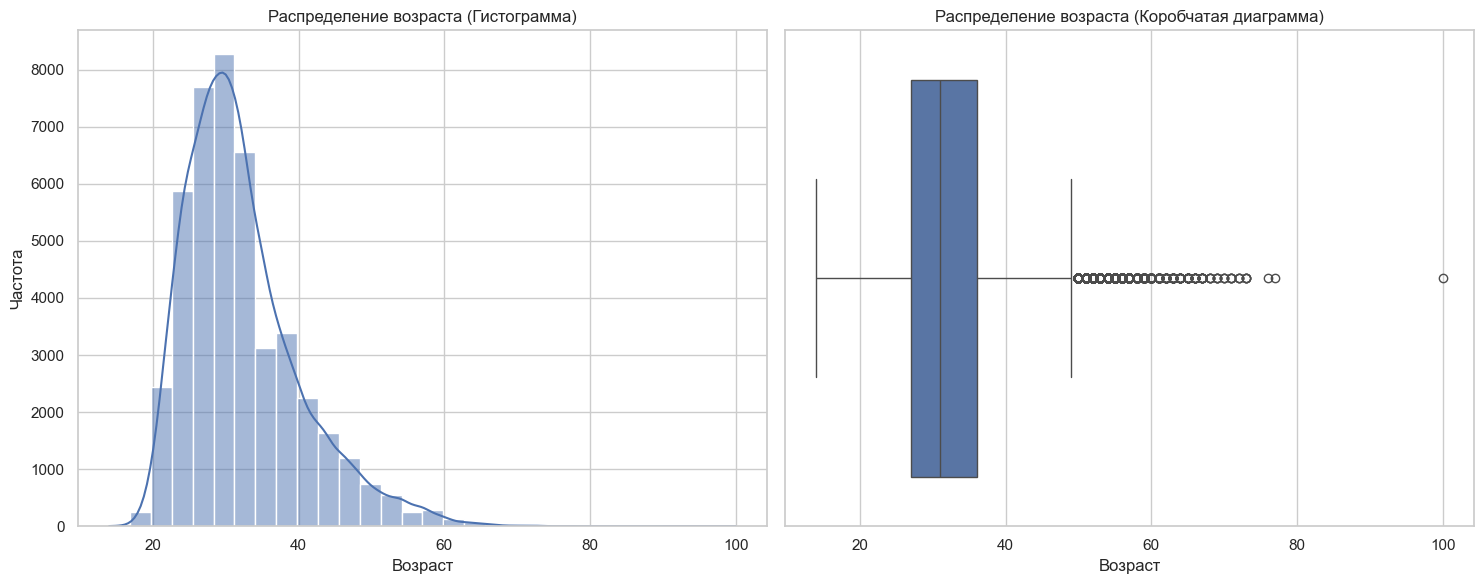

In [162]:

# ваш код здесь
# Устанавливаем стиль для визуализации
sns.set(style="whitegrid")

# Создаем фигуру и две подграфики для гистограммы и коробчатой диаграммы
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма возраста
sns.histplot(hh_data['Возраст'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение возраста (Гистограмма)')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')

# Коробчатая диаграмма возраста
sns.boxplot(x=hh_data['Возраст'], ax=axes[1])
axes[1].set_title('Распределение возраста (Коробчатая диаграмма)')
axes[1].set_xlabel('Возраст')

plt.tight_layout()
plt.show()


In [163]:
# Дополнительный анализ распределения
# 1. Мода
moda_age = hh_data['Возраст'].mode().values[0]

# 2. Предельные значения
min_age = hh_data['Возраст'].min()
max_age = hh_data['Возраст'].max()

# 3. Квартильный интервал для большинства соискателей
age_quartiles = hh_data['Возраст'].quantile([0.25, 0.5, 0.75])

print("Мода возраста:", moda_age)
print("Минимальный возраст:", min_age)
print("Максимальный возраст:", max_age)
print("Интерквартильный интервал (25%, 50%, 75%):")
print(age_quartiles)


Мода возраста: 30
Минимальный возраст: 14
Максимальный возраст: 100
Интерквартильный интервал (25%, 50%, 75%):
0.25   27.00
0.50   31.00
0.75   36.00
Name: Возраст, dtype: float64


* Мода распределения возраста равна 30. Минимальное значение признака 14. Максимальное значение 100.
* Возраст большинства соискателей находится в пределах 27 - 36 лет.
* Аномалией можно считать максимальнывй возраст который равен 100 лет, да и все те, что дальше границы "усов".

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

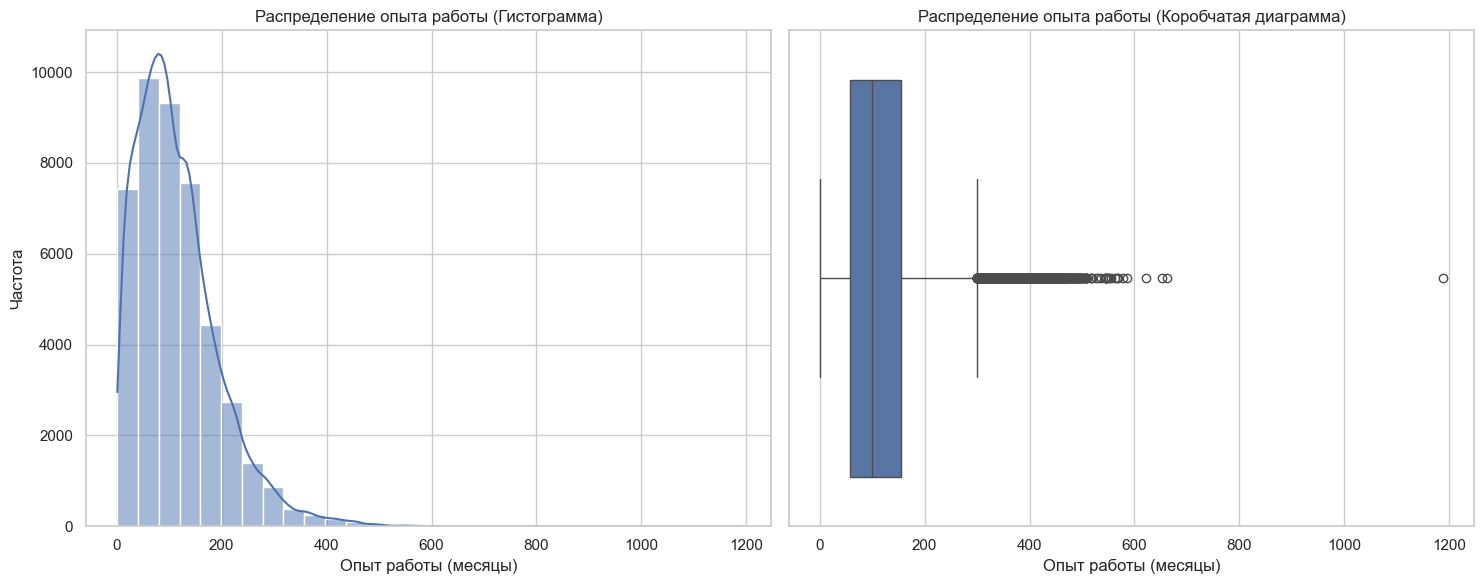

Мода опыта работы (месяцы): 81.0
Минимальный опыт работы (месяцы): 1.0
Максимальный опыт работы (месяцы): 1188.0
Интерквартильный интервал (25%, 50%, 75%):
0.25    57.00
0.50   100.00
0.75   154.00
Name: Опыт работы (месяц), dtype: float64


In [164]:
# ваш код здесь

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма опыта работы
sns.histplot(hh_data['Опыт работы (месяц)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение опыта работы (Гистограмма)')
axes[0].set_xlabel('Опыт работы (месяцы)')
axes[0].set_ylabel('Частота')

# Коробчатая диаграмма опыта работы
sns.boxplot(x=hh_data['Опыт работы (месяц)'], ax=axes[1])
axes[1].set_title('Распределение опыта работы (Коробчатая диаграмма)')
axes[1].set_xlabel('Опыт работы (месяцы)')

plt.tight_layout()
plt.show()

# Дополнительный анализ распределения
# 1. Мода
moda_experience = hh_data['Опыт работы (месяц)'].mode().values[0]

# 2. Предельные значения
min_experience = hh_data['Опыт работы (месяц)'].min()
max_experience = hh_data['Опыт работы (месяц)'].max()

# 3. Квартильный интервал для большинства соискателей
experience_quartiles = hh_data['Опыт работы (месяц)'].quantile([0.25, 0.5, 0.75])


# Выводим результаты анализа
print("Мода опыта работы (месяцы):", moda_experience)
print("Минимальный опыт работы (месяцы):", min_experience)
print("Максимальный опыт работы (месяцы):", max_experience)
print("Интерквартильный интервал (25%, 50%, 75%):")
print(experience_quartiles)


* Мода распределения равна 81 месяцу
* Минимальный опыт работы составляет 1 месяц, максимальный 1188 (99 лет)
* Опыт работы большинства соискателей находится между 57 и 154 месяцами 
* В аномалии я бы сразу вписал максимальный опыт работы 

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


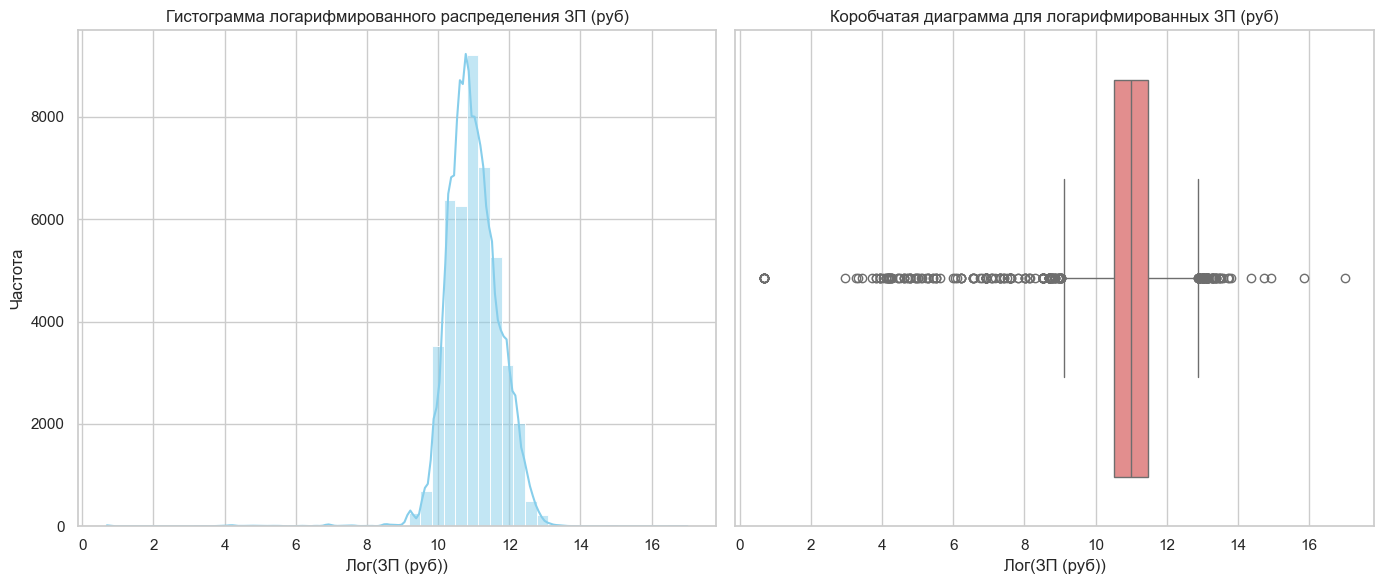

count      44744.00
mean       76533.54
std       135931.51
min            1.00
25%        37082.20
50%        59019.00
75%        95000.00
max     24304876.00
Name: ЗП (руб), dtype: float64
Количество соискателей, которые требуют заработную плату выше 1 миллиона рублей: 5


In [165]:
# ваш код здесь

# Применяем логарифмическую трансформацию к значениям ЗП (руб), добавляя 1 для предотвращения логарифма от 0
hh_data['log_ЗП (руб)'] = np.log(hh_data['ЗП (руб)'] + 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для логарифмированных значений
sns.histplot(hh_data['log_ЗП (руб)'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Гистограмма логарифмированного распределения ЗП (руб)')
axes[0].set_xlabel('Лог(ЗП (руб))')
axes[0].set_ylabel('Частота')

# Коробчатая диаграмма для логарифмированных значений
sns.boxplot(x=hh_data['log_ЗП (руб)'], ax=axes[1], color='lightcoral')
axes[1].set_title('Коробчатая диаграмма для логарифмированных ЗП (руб)')
axes[1].set_xlabel('Лог(ЗП (руб))')

plt.tight_layout()
plt.show()

# Рассчитываем основные статистики
salary_stats = hh_data['ЗП (руб)'].describe()
print(salary_stats)

# Фильтруем данные по ЗП (руб) больше 1 млн
hh_data_high_salary = hh_data[hh_data['ЗП (руб)'] > 1000000]

# Подсчитываем количество соискателей с ЗП больше 1 млн
high_salary_count = hh_data_high_salary.shape[0]

print(f"Количество соискателей, которые требуют заработную плату выше 1 миллиона рублей: {high_salary_count}")




Чтобы хоть что-то было видно на графике трансформировал ЗП в логарифм
* Минимальная ЗП составляет 1 рубль, в то время как максимальная получилась, без ограничения, 24.3 млн.руб
* Большинство зарплат находится в интервале от 37 тысяч до 95 иысяч рублей.
* Аномалией для данного параметрая является максимальная ЗП? Эта гигантская желаемая ЗП не дает нормально построить график.


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

C:\Users\mkond\AppData\Local\Temp\ipykernel_8408\3460974140.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ЗП (руб)', y='Образование', data=median_salary_by_education, palette='viridis')


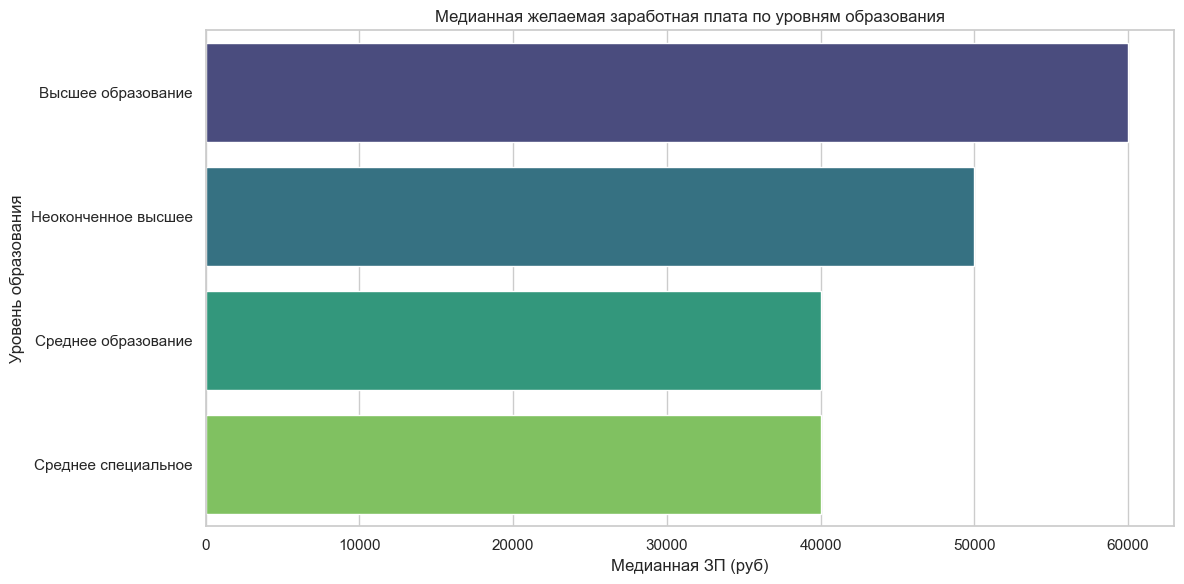

In [166]:
# ваш код здесь
# Фильтруем данные, чтобы оставить только те строки, где ЗП (руб) < 1 млн
df_filtered = hh_data[hh_data['ЗП (руб)'] < 1_000_000]

# Группируем по уровню образования и вычисляем медиану ЗП
median_salary_by_education = df_filtered.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Сортируем значения по медианной заработной плате
median_salary_by_education = median_salary_by_education.sort_values('ЗП (руб)', ascending=False)

# Строим диаграмму
plt.figure(figsize=(12, 6))
sns.barplot(x='ЗП (руб)', y='Образование', data=median_salary_by_education, palette='viridis')
plt.title('Медианная желаемая заработная плата по уровням образования')
plt.xlabel('Медианная ЗП (руб)')
plt.ylabel('Уровень образования')
plt.tight_layout()
plt.show()

* Для среднего и среднего специального наблюдаются наименьшие медианные ЗП, а для высшего образования медианное значение больше всего.
* Считаю что данные показатель важен поскольку он поскольку он часто коррелирует с требуемыми знаниями и квалификацией для выполнения определенной работы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

C:\Users\mkond\AppData\Local\Temp\ipykernel_8408\3502923057.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Город', y='ЗП (руб)', data=df_filtered, palette='viridis')


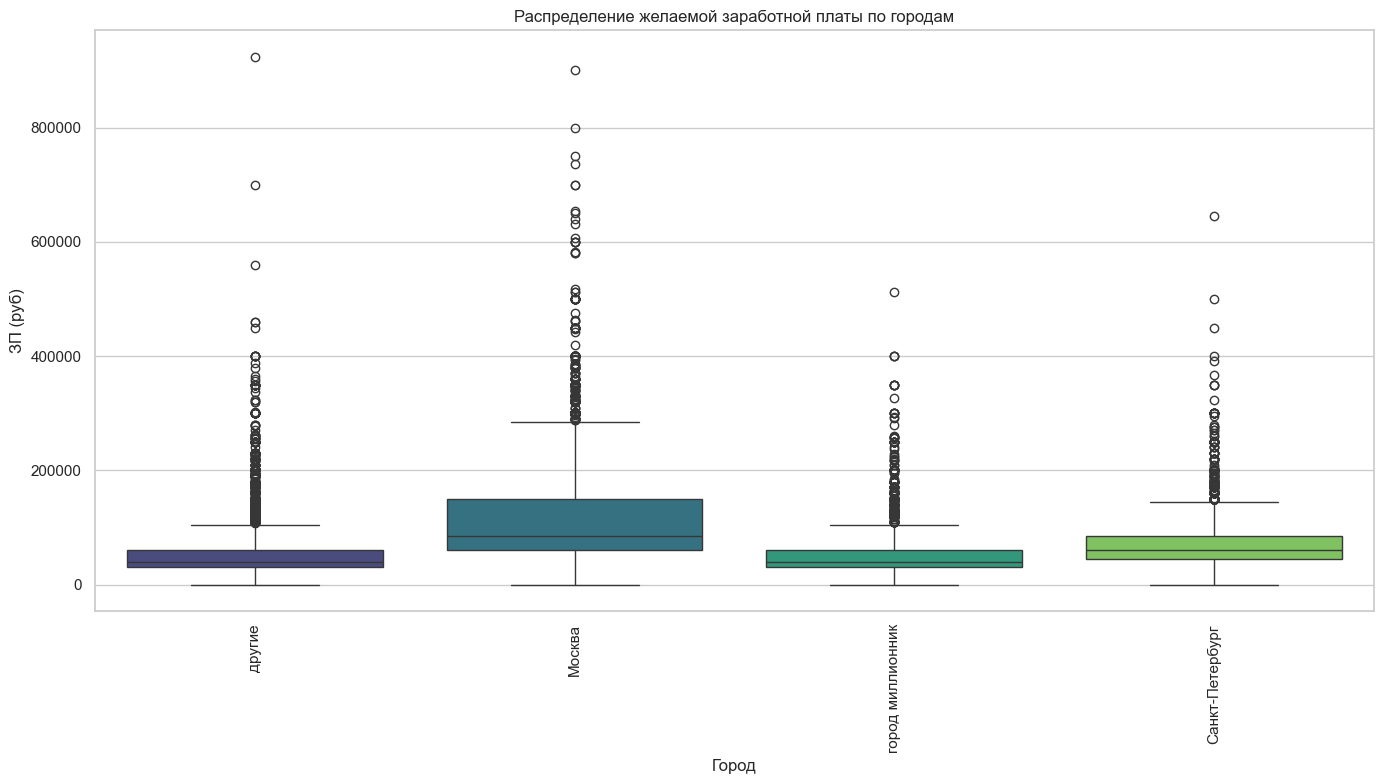

In [167]:
# ваш код здесь
# Фильтруем данные, чтобы оставить только те строки, где ЗП (руб) < 1 млн
df_filtered = hh_data[hh_data['ЗП (руб)'] < 1000000]

# Построим коробчатую диаграмму
plt.figure(figsize=(14, 8))
sns.boxplot(x='Город', y='ЗП (руб)', data=df_filtered, palette='viridis')

# Настроим вид графика
plt.title('Распределение желаемой заработной платы по городам')
plt.xlabel('Город')
plt.ylabel('ЗП (руб)')
plt.xticks(rotation=90)  # Чтобы метки городов не налезали друг на друга
plt.tight_layout()
plt.show()

*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

* В Москве медианный уровень ЗП выше чем в остальных городах, Санкт-Петербург на втором месте, а города миллионники и "другие" на одном уровне примерно.
* Признак города важен если мы набираем персонал непосредственно для работы в своем городе и в своем офисе. В случае если человек работает удаленно в другом городе, то уровень его ЗП может быть куда выше медианного в его родном городе.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

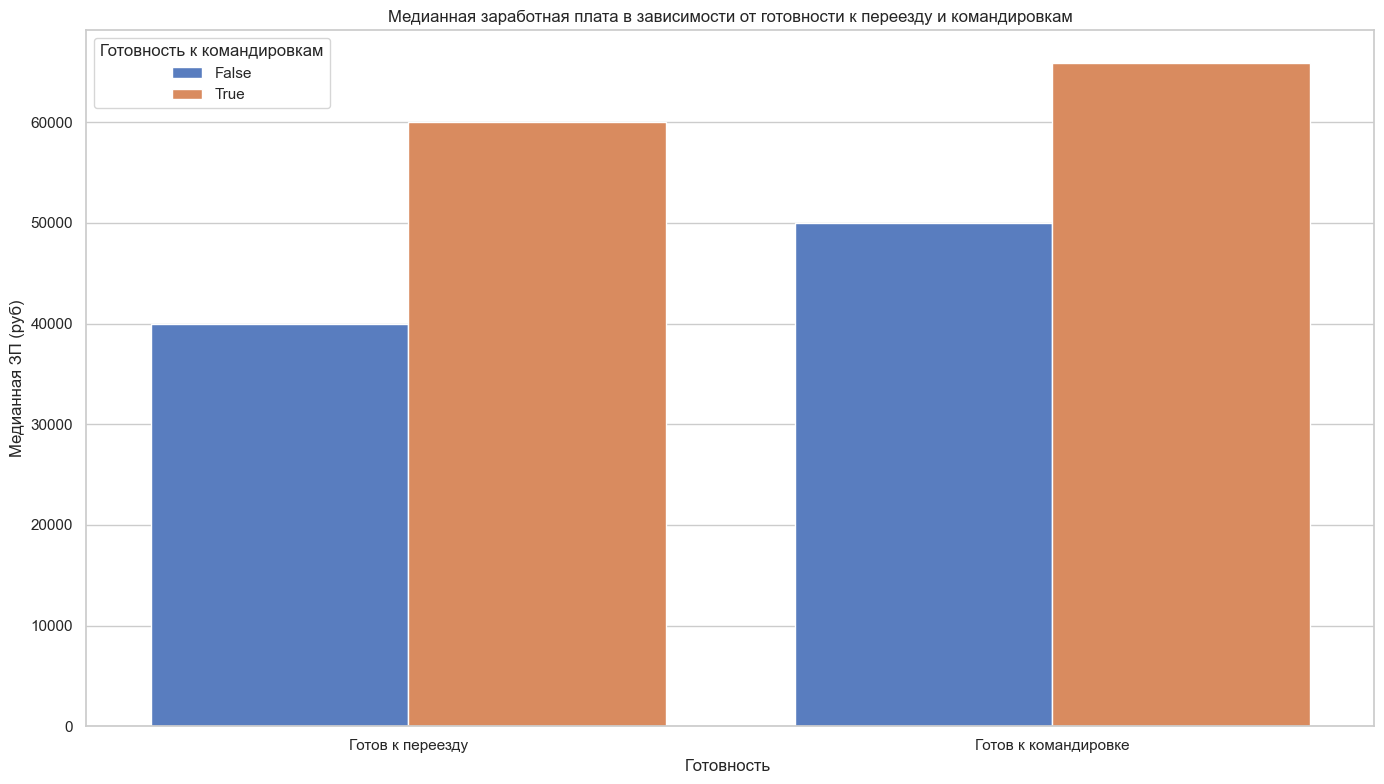

In [168]:
# ваш код здесь

# Группируем данные по признакам "Готовность к переезду" и "Готовность к командировкам" и находим медиану ЗП
hh_grouped = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

# Построение многоуровневой столбчатой диаграммы
plt.figure(figsize=(14, 8))
sns.barplot(x='Готовность к переезду', y='ЗП (руб)', hue='Готовность к командировкам', data=hh_grouped, palette='muted')

# Настройка графика
plt.title('Медианная заработная плата в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность ')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(ticks=[0, 1], labels=['Готов к переезду', 'Готов к командировке'])
plt.tight_layout()
plt.show()

In [169]:
# Фильтруем данные для соискателей, готовых к переезду и командировкам
salary_median = hh_data[(hh_data['Готовность к переезду'] == True) & (hh_data['Готовность к командировкам'] == True)]['ЗП (руб)'].median()

# Приводим к тысячам и округляем
salary_median_thousands = round(salary_median / 1000)
print(salary_median_thousands)


66


По графикам видно, что люди которые готовы к перезду или командировкам запрашивают больше ЗП

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

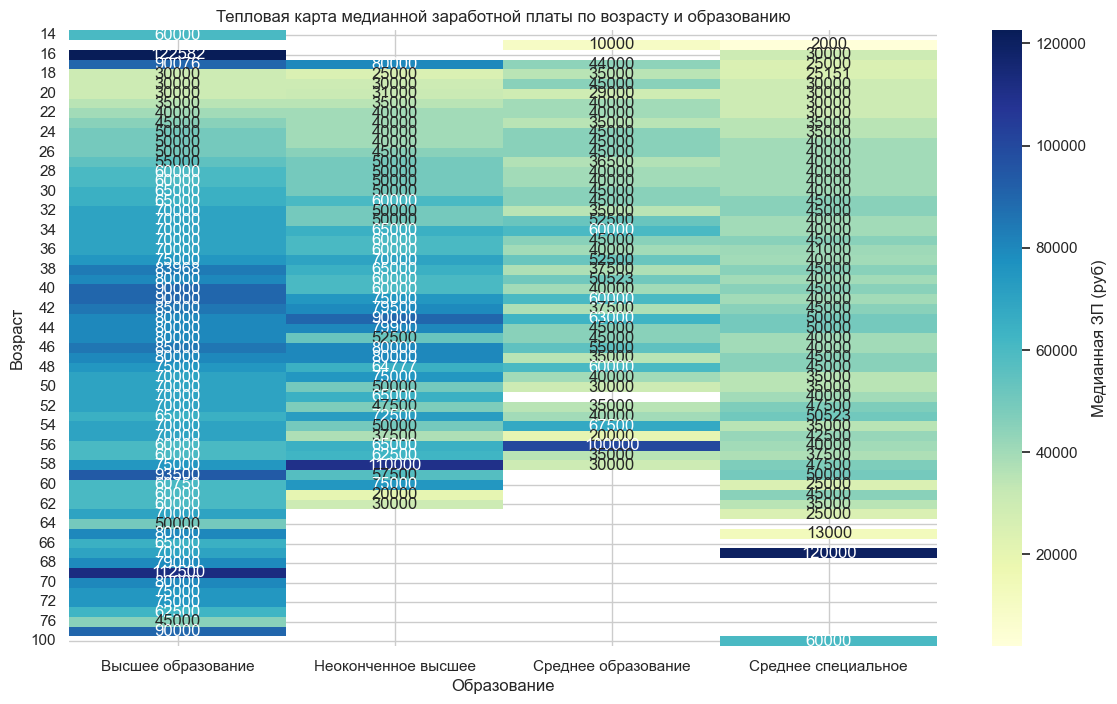

In [170]:
# ваш код здесь
# Создаем сводную таблицу: медианная заработная плата по возрасту и образованию
pivot_table = hh_data.pivot_table(values='ЗП (руб)', 
                                  index='Возраст', 
                                  columns='Образование', 
                                  aggfunc='median')

# Построение тепловой карты на основе сводной таблицы
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Медианная ЗП (руб)'})

# Настройка графика
plt.title('Тепловая карта медианной заработной платы по возрасту и образованию')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()

* Группа "Высшее образование" имеет наиболее полный набор возрастов. Также больше всего аномалий встречается именно в группе "Высшее образование" тут есть соискатели 14-18 лет с высшим образованием и с аномально ввысокой ЗП. 
* Группа "Неоконченное высшее образование" имеет полный градиент ЗП в то время как "Среднее образование" и "Среднее специальное" держаться в половине градиента.
* Наш аномальный возраст находится в группе "Среднее специальное" 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

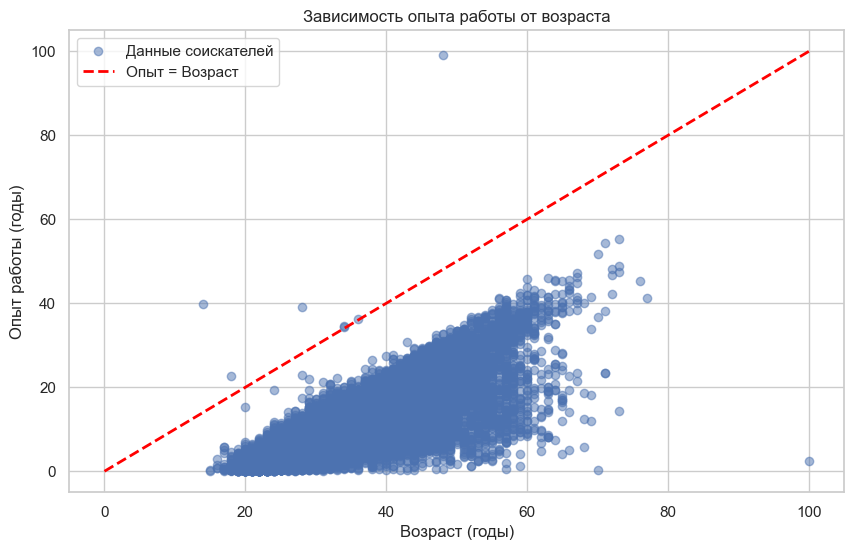

In [171]:
# ваш код здесь
# Преобразуем опыт работы из месяцев в годы
hh_data['Опыт работы (годы)'] = hh_data['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(hh_data['Возраст'], hh_data['Опыт работы (годы)'], alpha=0.5, label='Данные соискателей')

# Построение прямой, где опыт работы равен возрасту
plt.plot([0, 100], [0, 100], color='red', linestyle='--', linewidth=2, label='Опыт = Возраст')

# Настройка графика
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (годы)')
plt.ylabel('Опыт работы (годы)')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
# Добавим столбец "Опыт в годах" на основе уже имеющегося "Опыт работы (месяц)"
hh_data['Опыт в годах'] = hh_data['Опыт работы (месяц)'] / 12

# Фильтруем строки, где "Опыт в годах" больше "Возраст"
above_line = hh_data[hh_data['Опыт в годах'] > hh_data['Возраст']]

# Получаем количество таких точек
num_points_above_line = above_line.shape[0]
print(num_points_above_line)

7


Большинство данных находятся ниже прямой. Есть небольшое кол-во аномалий. В основном опыт работы меньше чем лет соискателю. эта разница в районе периода обучения.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


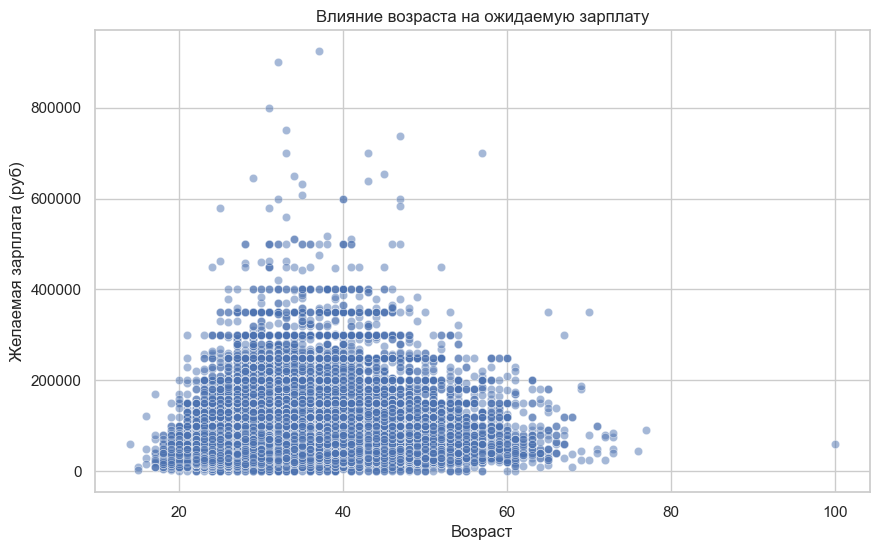

In [173]:
# ваш код здесь
df_filtered = hh_data[hh_data['ЗП (руб)'] < 1000000]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Возраст', y='ЗП (руб)', alpha=0.5)
plt.title('Влияние возраста на ожидаемую зарплату')
plt.xlabel('Возраст')
plt.ylabel('Желаемая зарплата (руб)')
plt.grid(True)
plt.show()


График отношения ЗП от возраста соискателя.
* Видно что больше всего просят соискатели в возрасте от 30 до 40 лет.
* Чем старше соискатель тем меньше ЗП он желает. Видимо связано с пенсией. А молодые просят меньше из-за опыта.

C:\Users\mkond\AppData\Local\Temp\ipykernel_8408\1262214672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Пол", y="ЗП (руб)", palette="Set2")


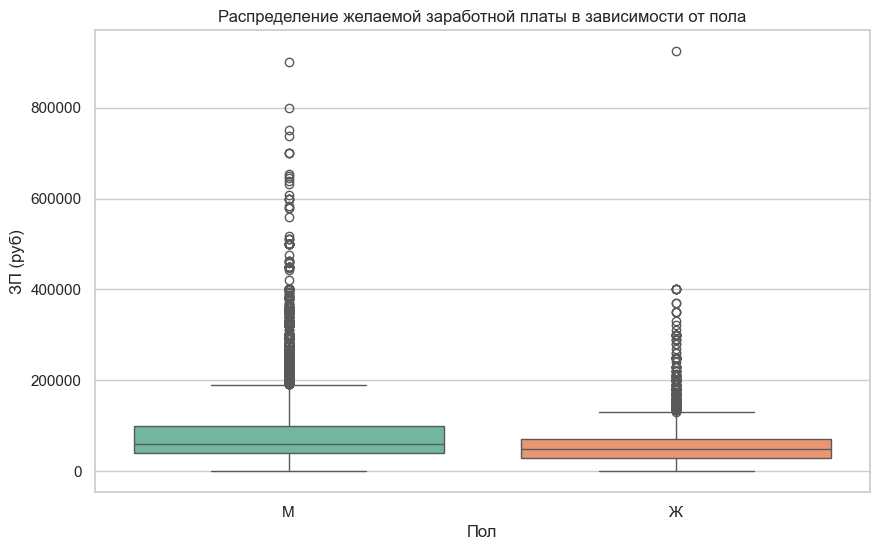

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="Пол", y="ЗП (руб)", palette="Set2")

plt.title("Распределение желаемой заработной платы в зависимости от пола")
plt.xlabel("Пол")
plt.ylabel("ЗП (руб)")
plt.show()

График Желаемой ЗП по группам "Мужчины" м "Женщины" 
* По графику видно, что медианная ЗП у женщин чуть ниже чем у мужчин.
* Сама коробка у женщин меньше, чем у мужчин. Из этого следует, что меньше 25% и 75% граница желаемой ЗП у женщин.
* Больше всего отклонений от коробки с усами у мужчин. Что по кол-ву, что по желаемой ЗП.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [175]:
# ваш код здесь
hh_data.shape[0]
hh_data = hh_data.drop(columns=['log_ЗП (руб)', 'Опыт работы (годы)', 'Опыт в годах'])
hh_data_clear = hh_data.drop_duplicates()

hh_data_clear.shape[0]

count_drop = hh_data.shape[0] - hh_data_clear.shape[0]

print(f"Было найдено и удалено: {count_drop} строка")


Было найдено и удалено: 161 строка


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [176]:
# ваш код здесь
# Подсчитываем пропуски в каждом столбце
missing_data = hh_data_clear.isnull().sum()

# Выводим результат
display(missing_data)

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [177]:
# ваш код здесь
# Удаление строк с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
hh_data_clear = hh_data_clear.dropna(subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"])

# Заполнение пропусков в столбце "Опыт работы (месяц)" медианным значением
median_experience = hh_data_clear["Опыт работы (месяц)"].median()
hh_data_clear["Опыт работы (месяц)"].fillna(median_experience, inplace=True)

# Проверка на наличие пропусков после обработки
display(hh_data_clear.isnull().sum())

C:\Users\mkond\AppData\Local\Temp\ipykernel_8408\1514544887.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hh_data_clear["Опыт работы (месяц)"].fillna(median_experience, inplace=True)


Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
частичная занятость                0
проектная работа                   0
волонтерство                       0
стажировка                         0
полный день                        0
сменный график                     0
гибкий график                      0
удаленная работа                   0
вахтовый метод                     0
ЗП (руб)                           0
dtype: int64

In [178]:
# Рассчитываем среднее значение в столбце "Опыт работы (месяц)" после заполнения пропусков
average_experience = hh_data_clear["Опыт работы (месяц)"].mean()

# Округляем среднее значение до целых
average_experience_rounded = round(average_experience)

print(f'Результируюшие среднее значение в столбце "Опыт работы (месяц)" = {average_experience_rounded}')

Результируюшие среднее значение в столбце "Опыт работы (месяц)" = 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [179]:
# ваш код здесь
do = hh_data_clear.shape[0]

# Инвертируем условие с помощью ~ для удаления выбросов
hh_data_clear = hh_data_clear[~((hh_data_clear['ЗП (руб)'] > 1000000) | (hh_data_clear['ЗП (руб)'] < 1000))]

posle = hh_data_clear.shape[0]
vibros = do - posle
print(f"Было найдено {vibros} выбросов")

salary_stats = hh_data_clear['ЗП (руб)'].describe()
display(salary_stats)
hh_data_clear.info()

Было найдено 89 выбросов


count     44492.00
mean      75820.63
std       60640.34
min        1000.00
25%       38000.00
50%       59995.00
75%       95000.00
max     1000000.00
Name: ЗП (руб), dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 44492 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44492 non-null  object 
 1   Последнее/нынешнее место работы  44492 non-null  object 
 2   Последняя/нынешняя должность     44492 non-null  object 
 3   Обновление резюме                44492 non-null  object 
 4   Авто                             44492 non-null  object 
 5   Образование                      44492 non-null  object 
 6   Пол                              44492 non-null  object 
 7   Возраст                          44492 non-null  int64  
 8   Опыт работы (месяц)              44492 non-null  float64
 9   Город                            44492 non-null  object 
 10  Готовность к переезду            44492 non-null  bool   
 11  Готовность к командировкам       44492 non-null  bool   
 12  полная занятость       

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь
# Рассчитаем опыт работы в годах
hh_data_clear['Опыт работы (годы)'] = hh_data_clear['Опыт работы (месяц)'] / 12

# Количество строк до удаления
do = hh_data_clear.shape[0]

# Фильтруем строки, где опыт работы не превышает возраст
hh_data_clear = hh_data_clear[hh_data_clear['Опыт работы (годы)'] <= hh_data_clear['Возраст']]

# Количество строк после удаления
posle = hh_data_clear.shape[0]

# Число удалённых строк
удаленные_строки = do - posle
print(f"Было найдено и удалено {удаленные_строки} резюме с некорректным соотношением возраста и опыта работы.")


Было найдено и удалено 7 резюме с некорректным соотношением возраста и опыта работы.


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

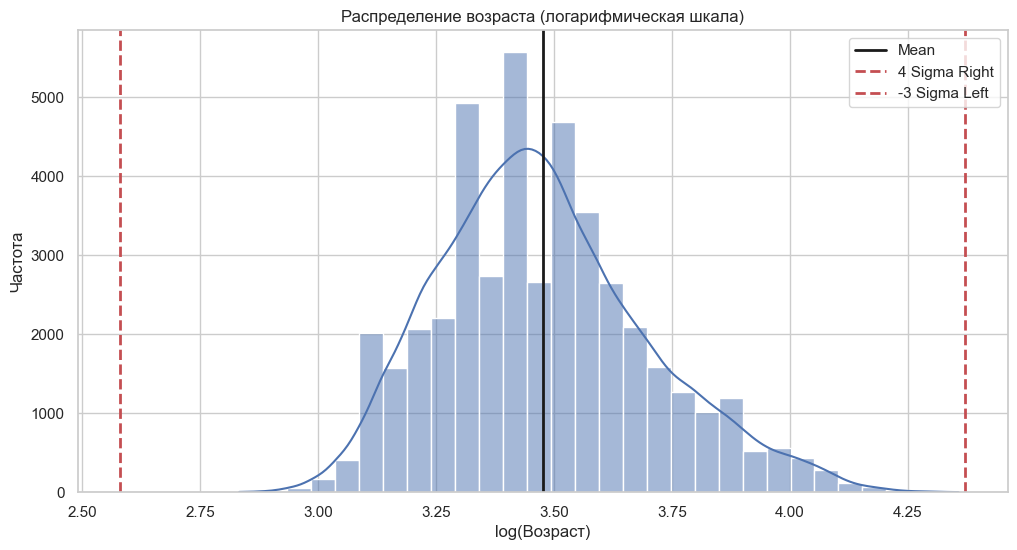

Empty DataFrame
Columns: [Возраст, log_Возраст, z_score_log_Возраст]
Index: []


In [190]:
# ваш код здесь

# Берем логарифм возраста
hh_data_clear['log_Возраст'] = np.log(hh_data_clear['Возраст']+1)

# Рассчитываем среднее и стандартное отклонение
log_age_mean = hh_data_clear['log_Возраст'].mean()
log_age_std = hh_data_clear['log_Возраст'].std()

# Находим z-оценки
hh_data_clear['z_score_log_Возраст'] = (hh_data_clear['log_Возраст'] - log_age_mean) / log_age_std

# Условие для удаления выбросов (в правую сторону больше 4 сигм)
outliers = hh_data_clear[hh_data_clear['z_score_log_Возраст'] > 4]

# График распределения логарифма возраста с двумя границами 4 сигм
plt.figure(figsize=(12, 6))
sns.histplot(hh_data_clear['log_Возраст'], bins=30, kde=True)
plt.axvline(log_age_mean, color='k', lw=2, label='Mean')
plt.axvline(log_age_mean + 4 * log_age_std, color='r', linestyle='--', lw=2, label='4 Sigma Right')
plt.axvline(log_age_mean - 4 * log_age_std, color='r', linestyle='--', lw=2, label='-3 Sigma Left')
plt.title('Распределение возраста (логарифмическая шкала)')
plt.legend()
plt.xlabel('log(Возраст)')
plt.ylabel('Частота')
plt.show()

# Просмотр выбросов
print(outliers[['Возраст', 'log_Возраст', 'z_score_log_Возраст']])



* На графике видно, что распределение слегка смещено вправо. Это означает, что в данных присутствуют возрастные выбросы в сторону более старших соискателей.
* В отклонение попал соискатель с возрастом 100 лет. По предыдущим графикам видно было видно, что он имеет среднее специально образование.